# Customizing analysis

This tutorial shows how to calculate and Multispectral bands, create custom function (CF) and apply them to:
* plot images.
* generate new bands values.
* save images with the desired cropping.


In [1]:
import Pynomic
import numpy as np 

## Reading the data

In [ ]:
path_folder_with_orthomosaics ="your/path/to/wheat/flight/data"
path_to_grid = 'your/path/to/grid.geojson'

In [32]:
wheatdata = Pynomic.process_stack_tiff(folder_path=path_folder_with_orthomosaics,
                           grid_path=path_to_grid,
                           col_id ='ID',
                           bands_n = ['red','green','blue','red_edge','nir'])

1/15 : 20210511_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
2/15 : 20210523_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
3/15 : 20210526_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
4/15 : 20210601_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
5/15 : 20210607_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
6/15 : 20210610_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
7/15 : 20210622_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
8/15 : 20210625_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
9/15 : 20210627_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system: EPSG:4326
10/15 : 20210628_Casselton_YT_5band.tif
Raster Coords system: EPSG:4326
Grid Coords system:

### Ploting original Plot

Displaing the plot image we can see that the grid cell doesnt mach perfectly the plot leaveing a lot of soil in the image.
We are going to use a custom fuction for solving this issue.

(<Axes: >, <Axes: xlabel='Flight dates', ylabel='nir'>)

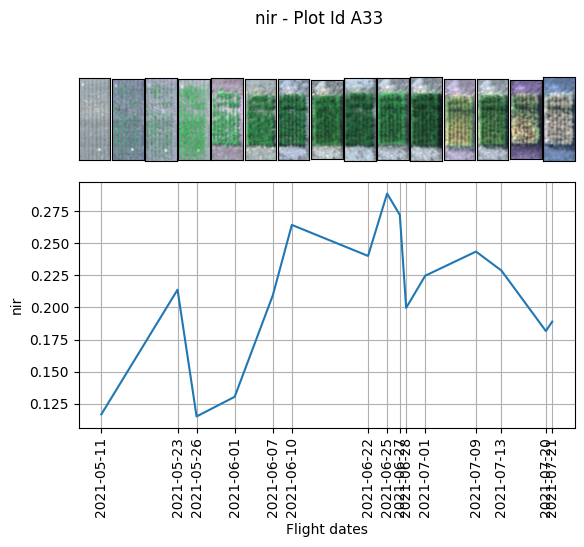

In [86]:
wheatdata.plot.RGB_image_timeline(band_name='nir',
                                  n_id='A33',
                                  Red= 'red',
                                  Green = 'green',
                                  Blue = 'blue')

### Definig the Custom function

We sart by defining the CF. As convention it always recives a dictionary with the bands names as key value.
first is preferable to define the top, bottom, left and rigth variables. Then we define the new bands with their new size.
lastly because we are working with reflectance values to display an image as an RGB we need to transform from float values to uin8 (0-255) to convert them to a legit RGB image.

In [ ]:
def crop_plots(bands_dictionary):
    top = 28
    bott = 105
    left = 5
    right = 45
    red = bands_dictionary['red'][top:bott,left:right]
    red *= (255.0/red.max())
    red = np.uint8(red.astype(int))
    green = bands_dictionary['green'][top:bott,left:right]
    green *= (255.0/green.max())
    green = np.uint8(green.astype(int))
    blue = bands_dictionary['blue'][top:bott,left:right]
    blue *= (255.0/blue.max())
    blue = np.uint8(blue.astype(int))
    
    return np.dstack([red,green,blue])

### Ploting the new plot size

(<Axes: >, <Axes: xlabel='Flight dates', ylabel='nir'>)

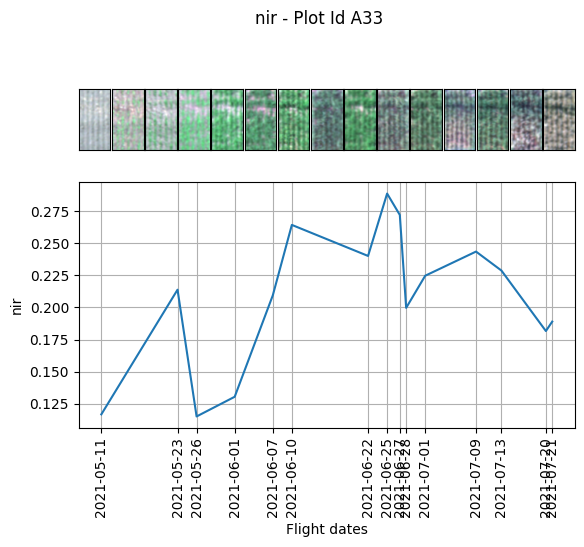

In [54]:
wheatdata.plot.image_timeline(band_name='nir',n_id='A33', function=crop_plots,)

### Extracting the new plot size bands values

Once we are happy with our new size plots we can extract the new bands values. If you don't need to modfy the size of the plot you can leave the "[ : ]" blank. To acces the matrix [:] is needed at the end of the key of the dictionary. In this case we extracted the mean of each plot and the standard deviation.

In [36]:
def new_values_plots(bands_dictionary):
    top = 28
    bott = 105
    left = 5
    right = 45
    red = bands_dictionary['red'][top:bott,left:right]
    green = bands_dictionary['green'][top:bott,left:right]
    blue = bands_dictionary['blue'][top:bott,left:right]
    red_edge = bands_dictionary['red_edge'][top:bott,left:right]
    nir = bands_dictionary['nir'][top:bott,left:right]

    return [np.mean(red),np.mean(green),
            np.mean(blue),np.mean(red_edge),
            np.mean(nir),
            np.std(red),np.std(green),
            np.std(blue),np.std(red_edge),
            np.std(nir)]


by default the function is going to return a pandas dataframe if you want to merge it with your data you can use the argument to_data=True

In [37]:
wheatdata.generate_unique_feature(function=new_values_plots,
                                  features_names=['red_1','green_1',
                                                  'blue_1','red_edge_1',
                                                  'nir_1',
                                                  'red_1_std','green_1_std',
                                                  'blue_1_std','red_edge_1_std',
                                                  'nir_1_std'],
                                  to_data=True)

,id,ID,date,red,green,blue,red_edge,nir,fid,PlotID,...,red_1,green_1,blue_1,red_edge_1,nir_1,red_1_std,green_1_std,blue_1_std,red_edge_1_std,nir_1_std
0,A1,1,20210511,0.079625,0.064565,0.056540,0.085924,0.116750,1,1001,...,0.079973,0.064832,0.056805,0.086271,0.117211,0.005816,0.004439,0.003675,0.005513,0.008106
1,A2,2,20210511,0.079396,0.064210,0.056180,0.085608,0.116176,2,1002,...,0.080895,0.065393,0.057329,0.087024,0.118176,0.005185,0.003911,0.003335,0.004876,0.007304
2,A3,3,20210511,0.078963,0.063908,0.055878,0.085354,0.115766,3,1003,...,0.080089,0.064832,0.056810,0.086439,0.117279,0.005564,0.004273,0.003757,0.005244,0.007607
3,A4,4,20210511,0.078916,0.063968,0.055927,0.085323,0.115933,4,1004,...,0.080231,0.065072,0.057045,0.086714,0.117808,0.005401,0.004226,0.003653,0.005210,0.007314
4,A5,5,20210511,0.079116,0.064385,0.056466,0.085752,0.115963,5,1005,...,0.079948,0.065051,0.057146,0.086712,0.117095,0.005093,0.003777,0.003321,0.004611,0.007063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,A216,214,20210721,0.089757,0.075063,0.050174,0.128152,0.210272,216,1216,...,0.096029,0.081272,0.044568,0.157370,0.279594,0.028691,0.019947,0.012125,0.040882,0.062336
3296,A217,213,20210721,0.088135,0.075693,0.049265,0.130425,0.219141,217,1217,...,0.088831,0.079863,0.041864,0.155563,0.288157,0.023703,0.017420,0.010371,0.034934,0.051497
3297,A218,212,20210721,0.096041,0.078900,0.051239,0.139705,0.225056,218,1218,...,0.103316,0.084538,0.045481,0.170678,0.294616,0.028491,0.017881,0.010534,0.039607,0.054525
3298,A219,211,20210721,0.103085,0.082911,0.055502,0.141878,0.220687,219,1219,...,0.120345,0.095757,0.055048,0.180914,0.295111,0.038385,0.024423,0.015709,0.048403,0.062471


As we can obseve in the new plot with the new nir band the dynamic is very similar to the previous one, but the values change.

(<Axes: >, <Axes: xlabel='Flight dates', ylabel='nir_1'>)

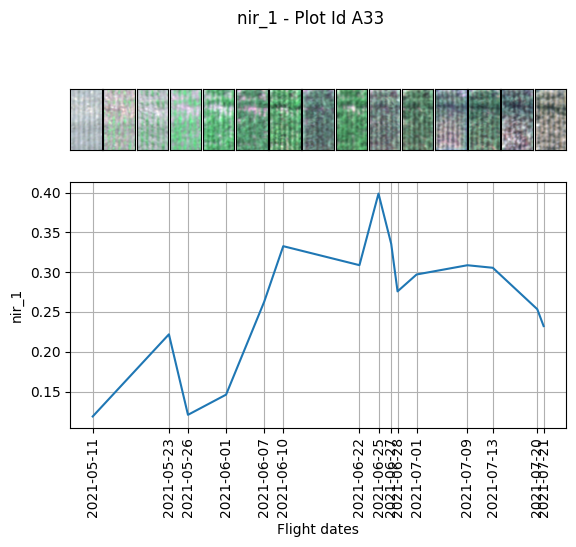

In [53]:
wheatdata.plot.image_timeline(band_name='nir_1',n_id='A33', function=crop_plots)

### Obtaining the Multispectral values

With our updated values we can automatically calculate the multispectral vegetation indices

In [40]:
wheatdata.Multispectral_VI(Red='red_1',
                           Blue='blue_1',
                           Green='green_1',
                           Nir='nir_1',
                           Red_edge='red_edge_1')

In [41]:
wheatdata.ldata.head()

,id,ID,date,red,green,blue,red_edge,nir,fid,PlotID,...,NIRv,SR,SRredge,EVI,GNDRE,MCARI2,MTVI,MTVI2,RDVI,RTVI
0,A1,1,20210511,0.079625,0.064565,0.056540,0.085924,0.116750,1,1001,...,0.022135,1.465637,1.358637,0.079500,0.141886,0.019304,0.030003,0.044186,0.192972,2.570205
1,A2,2,20210511,0.079396,0.064210,0.056180,0.085608,0.116176,2,1002,...,0.022131,1.460855,1.357966,0.079417,0.141916,0.018839,0.029502,0.043341,0.193082,2.587339
2,A3,3,20210511,0.078963,0.063908,0.055878,0.085354,0.115766,3,1003,...,0.022099,1.464357,1.356778,0.079348,0.142833,0.019011,0.029754,0.043804,0.192847,2.559495
3,A4,4,20210511,0.078916,0.063968,0.055927,0.085323,0.115933,4,1004,...,0.022354,1.468363,1.358584,0.080200,0.142581,0.019810,0.030463,0.044844,0.193848,2.582058
4,A5,5,20210511,0.079116,0.064385,0.056466,0.085752,0.115963,5,1005,...,0.022075,1.464645,1.350389,0.079498,0.142729,0.019733,0.030253,0.044555,0.192737,2.517864


(<Axes: >, <Axes: xlabel='Flight dates', ylabel='GNDRE'>)

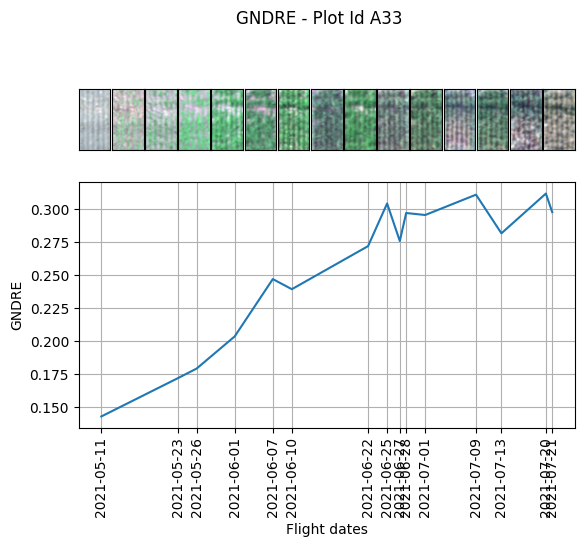

In [52]:
wheatdata.plot.image_timeline(band_name='GNDRE',n_id='A33', function=crop_plots)

### Vegetation index formula used to calculate.

| VEGETATION INDEX | FORMULA |
|:-----------------|:-------:|
|NDVI              |(NIR-Red)/(NIR + Red)|
|GNDVI             |(NIR-Green)/(NIR + Grenn)|
|NDRE              |(nir - red_ege)/(nir + red_edge)|
|EVI_2             |2.5 * ((nir - red) / (nir + (2.4 * red) + 1))|
|SAVI              |(1.5 * (nir - red)) / (nir + red + 0.5)|
|OSAVI             |(1.16 * (nir - red)) / (nir + red + 0.16)|
|TDIV              |np.sqrt((0.5 + ((nir - red) / (nir + red))))|
|NIRv              |nir * ((nir - red) / (nir + red))|
|SR                |nir / red|
|SRredege          |nir / redge|
|EVI               |2.5 * ((nir - red) / (nir + 6 * red - 7.5 * blue + 1))|
|GNRDE             |(redge - green) / (redge + green)|
|MTVI              |1.2 * ((1.2 * (nir - green)) - (2.5 * (red - green)))|
|MDRE              |(nir - redge) / (nir + redge)|
|RDVI              |(nir - red) / np.sqrt(nir - red)|
|RTVI              |(100 * (nir - redge)) - (10 * (nir - green))|

### Saving our images with a custom function

Finally we can export our images. With the function save_indiv_plot_images. In this case we can use the same function that we created to plot the images because it returns a stack of the bands. In  this case we would save the RGB format of the plots. This function automatiacally generates a folder for each date and in this case saves a .jpg format. The name is going to be the Id we could use anothe unique id to name each image.

In [ ]:
wheatdata.save_indiv_plots_images(folder_path="your/folder/path",
                                  function = crop_plots,
                                  identification_col= 'id',
                                  file_type= 'jpg')


### Data origin

The data used in this tutorial is open source and comes from:

Filipe Inácio Matias, Andrew Green, Jennifer A. Lachowiec, David LeBauer, Max Feldman. Bison-Fly: Un sistema de código abierto para la recopilación de datos de fitomejoramiento mediante drones. The Plant Phenome Journal, 2022. https://doi.org/10.1002/ppj2.20048
